### Filtros Paso-Alto
Sea $A \in {\rm I\!R}^{m \times n}$ una imagen a escala de grises.

#### Filtro Laplaciano
La función laplaciana de $f(x,y)$ se define como:

\begin{equation}
\nabla_{f}^{2} (x, y) = \dfrac{\partial^2 f}{\partial x^2} + \dfrac{\partial^2 f}{\partial y^2}
\end{equation}

Para valores discretos, las derivadas parciales se pueden aproximar como:

\begin{equation}
\dfrac{\partial^2 f}{\partial x^2} \approx f(x+1,y) + f(x-1,y) - 2f(x,y)
\end{equation}

\begin{equation}
\dfrac{\partial^2 f}{\partial y^2} \approx f(x,y+1) + f(x,y-1) - 2f(x,y)
\end{equation}

Por lo tanto, el laplaciano se puede aproximar como:

\begin{equation}
\nabla_{f}^{2} (x, y) =f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)
\end{equation}

Esto se puede ver de como una matriz

\begin{array}{|c|c|c|} \hline
\: & 1  & \: \\\hline
1  & -4 & 1  \\\hline
\: & 1  & \: \\\hline
\end{array}

Por lo tanto, si la matriz $A$ representa una aproximación discreta de $f(x,y)$, entonces

\begin{equation}
\text{Laplaciano(A)} \approx \nabla_{f}^{2} (x, y) \approx (A * B), \text{donde } B = \begin{bmatrix}
 0 & -1 &  0\\ 
-1 &  4 & -1\\ 
 0 & -1 &  0
\end{bmatrix}
\end{equation}

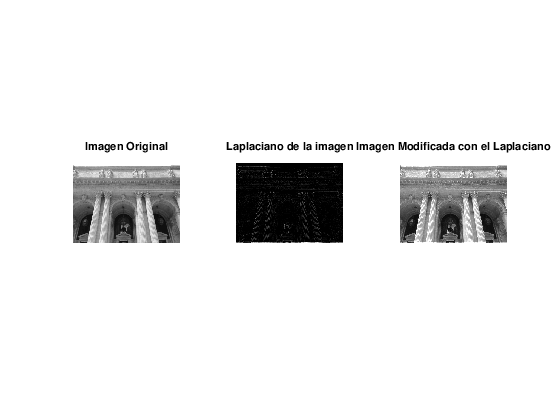

In [1]:
clc; clear;
% Informacion de la imagen original
A = imread('media/Columnas.jpg');
A = A(:, :, 1);
subplot(1, 3, 1);
imshow(A);
title('Imagen Original')

% Calcular el Laplaciano
A = double(A); [m, n] = size(A);
B = [0 -1 0; -1 4 -1; 0 -1 0];
C = conv2(A, B);
C = uint8(C);
C = C(2:m+1, 2:n+1);
subplot(1, 3, 2);
imshow(C);
title('Laplaciano de la imagen');

% Utilizar el Laplaciano para enfatizar los bordes de la imagen
alpha = 0.75;
D = A + alpha * double(C);
D = uint8(D);
subplot(1, 3, 3);
imshow(D);
title('Imagen Modificada con el Laplaciano')

*Nota*. Una forma de resaltar los bordes de una imagen es usando el laplaciano, a través de la fórmula

\begin{equation}
B(x,y) = f(x,y) + c \cdot \nabla_{f}^{2} (x, y)
\end{equation}

*Observación.* Una modificación para obtener una aproximación diferente del laplaciano, es usar la máscara:

\begin{equation}
B = \begin{bmatrix}
-1 & -1 & -1\\ 
-1 &  8 & -1\\ 
-1 & -1 & -1
\end{bmatrix}
\end{equation}

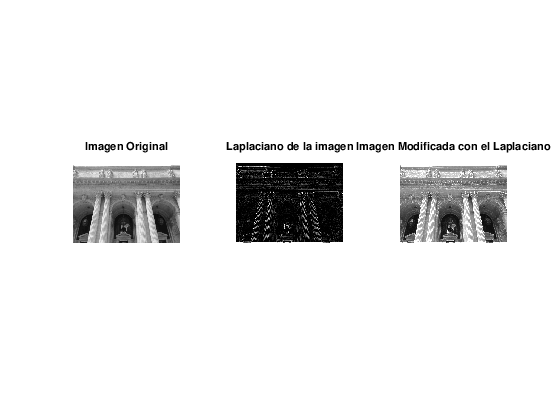

In [2]:
clc; clear;
% Informacion de la imagen original
A = imread('media/Columnas.jpg');
A = A(:, :, 1);
subplot(1, 3, 1);
imshow(A);
title('Imagen Original')

% Calcular el Laplaciano
A = double(A); [m, n] = size(A);
B = [-1 -1 -1; -1 8 -1; -1 -1 -1];
C = conv2(A, B);
C = uint8(C);
C = C(2:m+1, 2:n+1);
subplot(1, 3, 2);
imshow(C);
title('Laplaciano de la imagen');

% Utilizar el Laplaciano para enfatizar los bordes de la imagen
alpha = 0.75;
D = A + alpha * double(C);
D = uint8(D);
subplot(1, 3, 3);
imshow(D);
title('Imagen Modificada con el Laplaciano')

#### Filtro de Diferencia Direccional

Este tipo de filtros está dado por las siguientes matrices:

\begin{equation}
B_1 = \begin{bmatrix}
0 &  1 & 0\\ 
0 &  0 & 0\\ 
0 & -1 & 0
\end{bmatrix}
\quad
B_2 = \begin{bmatrix}
0 & 0 & 0\\ 
1 & 0 & -1\\ 
0 & 0 & 0
\end{bmatrix}
\quad
B_3 = \begin{bmatrix}
1 & 0 & 0\\ 
0 & 0 & 0\\ 
0 & 0 & -1
\end{bmatrix}
\quad
B_4 = \begin{bmatrix}
0 & 0 & -1\\ 
0 & 0 & 0 \\ 
1 & 0 & 0
\end{bmatrix}
\end{equation}

Estos filtros enfatizan los bordes en una dirección específica
- $B_1$: bordes verticales $\updownarrow$
- $B_2$: bordes horizontales $\leftrightarrow$
- $B_3$: bordes diagonales $\nwarrow \searrow$
- $B_4$: bordes diagonales $\nearrow \swarrow$

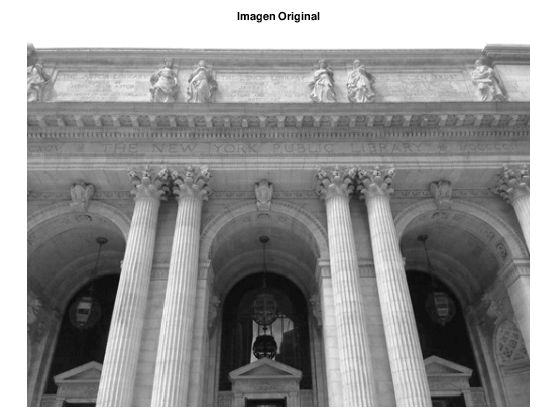

In [3]:
clc; clear;
% Informacion de la imagen original
%A = imread('media/Columnas.jpg');
A = imread('media/Columnas.jpg');
imshow(A);
title('Imagen Original')
A = double(A); [m, n] = size(A);

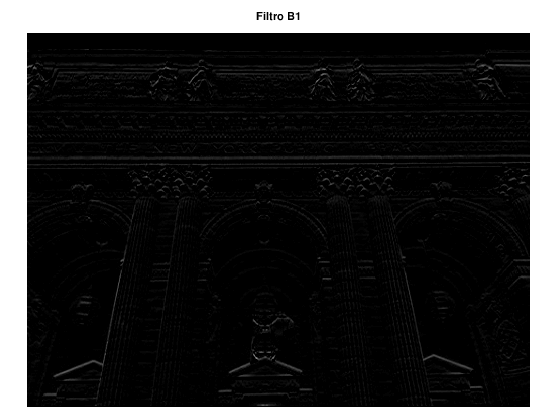

In [4]:
% Calcular el Filtro de Diferencia Direccional B1
B1 = [0 1 0; 0 0 0; 0 -1 0];
C1 = conv2(A, B1);
C1 = uint8(C1);
C1 = C1(2:m+1, 2:n+1);
imshow(C1);
title('Filtro B1');

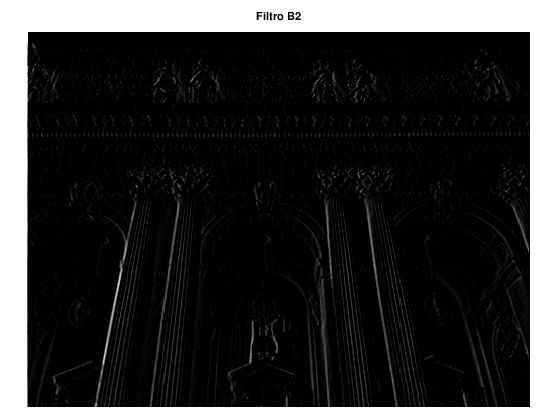

In [5]:
% Calcular el Filtro de Diferencia Direccional B2
B2 = [0 0 0; 1 0 -1; 0 0 0];
C2 = conv2(A, B2);
C2 = uint8(C2);
C2 = C2(2:m+1, 2:n+1);
imshow(C2);
title('Filtro B2');

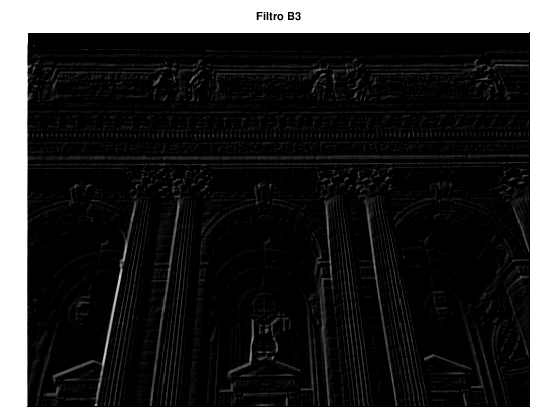

In [6]:
% Calcular el Filtro de Diferencia Direccional B3
B3 = [1 0 0; 0 0 0; 0 0 -1];
C3 = conv2(A, B3);
C3 = uint8(C3);
C3 = C3(2:m+1, 2:n+1);
imshow(C3);
title('Filtro B3');

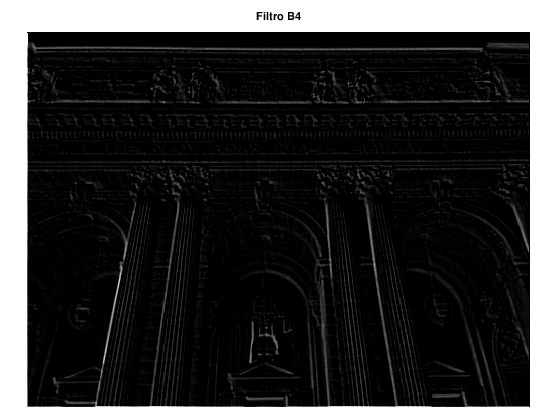

In [7]:
% Calcular el Filtro de Diferencia Direccional B4
B4 = [0 0 -1; 0 0 0; 1 0 0];
C4 = conv2(A, B4);
C4 = uint8(C4);
C4 = C4(2:m+1, 2:n+1);
imshow(C4);
title('Filtro B4');